## Selecting Best Titles

### A. Clustering Best Titles

In [1]:
import pandas as pd

data_anime = pd.read_csv("RawAnimeData.csv")
data_anime = data_anime.drop(columns=["Unnamed: 0"])
data_anime.head()

,year,season,jp_title,img,Japanese,Episodes,Starting,Ending,Producers,Studios,Main Studio,Source,Age Rating,Rating Score,Reviewers,Rating Score Rank,Popularity Rank,Members,Favorites
0,2021,winter,Jujutsu Kaisen,https://cdn.myanimelist.net/images/anime/1171/...,呪術廻戦,24,3 Oct 2020,27 Mar 2021,"Mainichi Broadcasting System, TOHO animation, ...",MAPPA,MAPPA,Manga,R - 17+ (violence & profanity),8.56,1.809780e+13,110,13.0,2755845,93161
1,2021,winter,Yuru Camp△ Season 2,https://cdn.myanimelist.net/images/anime/1255/...,ゆるキャン△ SEASON2,13,7 Jan 2021,1 Apr 2021,"Half H.P Studio, MAGES., DeNA",C-Station,C-Station,Manga,PG-13 - Teens 13 or older,8.50,1.052540e+11,145,1091.0,238832,3105
2,2021,winter,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,https://cdn.myanimelist.net/images/anime/1724/...,Re：ゼロから始める異世界生活,12,6 Jan 2021,24 Mar 2021,"AT-X, Memory-Tech, Hakuhodo DY Music & Picture...",White Fox,White Fox,Light novel,R - 17+ (violence & profanity),8.43,5.687810e+11,180,183.0,969121,13012
3,2021,winter,Mushoku Tensei: Isekai Ittara Honki Dasu,https://cdn.myanimelist.net/images/anime/1530/...,無職転生 ～異世界行ったら本気だす～,11,11 Jan 2021,22 Mar 2021,"Frontier Works, TOHO, Magic Capsule, TOHO anim...",Studio Bind,Studio Bind,Light novel,R - 17+ (violence & profanity),8.36,8.876810e+11,227,95.0,1438841,36751
4,2021,winter,Tensei shitara Slime Datta Ken 2nd Season,https://cdn.myanimelist.net/images/anime/1271/...,転生したらスライムだった件,12,12 Jan 2021,30 Mar 2021,Kodansha,8bit,8bit,Manga,PG-13 - Teens 13 or older,8.36,5.985960e+11,231,161.0,1033610,10879


In [2]:
data_anime = data_anime[["jp_title", "Main Studio", "Episodes", "Rating Score", "Rating Score Rank", "Popularity Rank", "Members", "Favorites", "Reviewers"]]
data_anime.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11


In [3]:
import numpy as np
import matplotlib.pyplot as plt

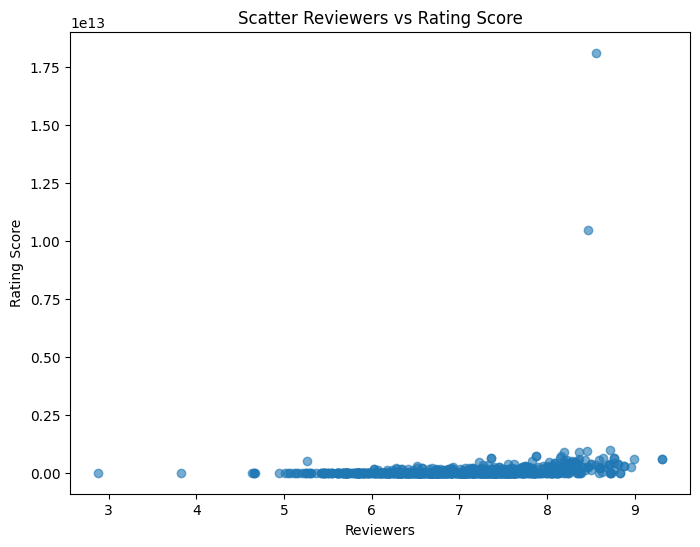

In [4]:
plt.figure(figsize=(8, 6))
plt.title("Scatter Reviewers vs Rating Score")
plt.xlabel("Reviewers")
plt.ylabel("Rating Score")

scatter = plt.scatter(
    x=data_anime["Rating Score"], 
    y=data_anime["Reviewers"], 
    alpha=0.6
);

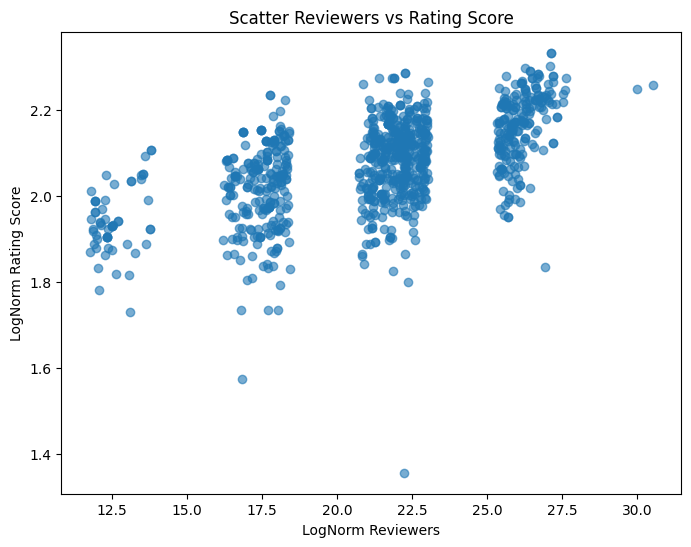

In [5]:
# Log Normal Transformation to Easily Spot the Differences
data_anime['log_norm_rating'] = np.log1p(data_anime['Rating Score'])
data_anime['log_norm_reviewers'] = np.log1p(data_anime['Reviewers'])

plt.figure(figsize=(8, 6))
plt.title("Scatter Reviewers vs Rating Score")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    alpha=0.6
);

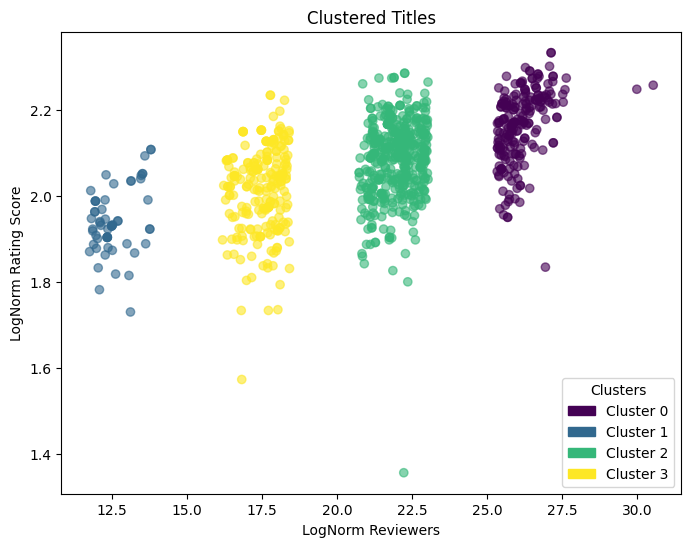

In [6]:
from sklearn.cluster import KMeans
from matplotlib.patches import Patch

cluster_features = ["log_norm_rating", "log_norm_reviewers"]

n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
data_anime["Cluster"] = kmeans.fit_predict(data_anime[cluster_features])

plt.figure(figsize=(8, 6))
plt.title("Clustered Titles")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")


scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    c=data_anime["Cluster"],  
    cmap='viridis', 
    alpha=0.6
)

handles = [Patch(color=scatter.cmap(scatter.norm(c)), label=f"Cluster {c}") 
           for c in np.unique(data_anime["Cluster"])]
plt.legend(handles=handles, title="Clusters", loc="lower right")

plt.show()

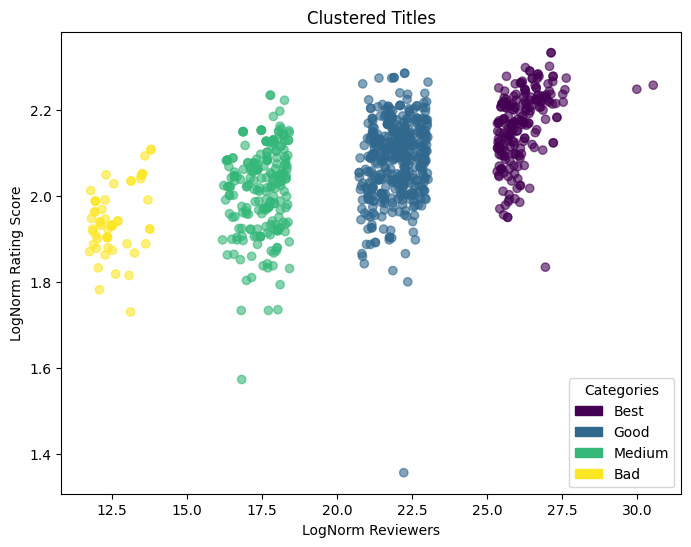

In [7]:
import matplotlib.patches as mpatches

data_anime['Category'] = data_anime['Cluster'].replace({0: 'Best', 1: 'Bad', 2: 'Good', 3: "Medium"})

plt.figure(figsize=(8, 6))
plt.title("Clustered Titles")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

categories = data_anime["Category"].unique()
color_map = {cat: i for i, cat in enumerate(categories)}

scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    c=data_anime["Category"].map(color_map), 
    cmap='viridis', 
    alpha=0.6
)

legend_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cat) for cat, i in color_map.items()]

plt.legend(handles=legend_handles, title="Categories", loc="lower right")
plt.show()

In [8]:
pd.pivot_table(data_anime, values="Rating Score", index="Category", aggfunc="mean")

,Rating Score
Category,
Bad,5.982241
Best,7.735849
Good,7.071851
Medium,6.546894


In [9]:
data_best = data_anime.loc[data_anime['Category'] == 'Best']
data_best.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11,2.251292,25.379642,0,Best
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11,2.243896,27.066761,0,Best
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11,2.236445,27.511878,0,Best
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11,2.236445,27.117853,0,Best


In [10]:
value = ["Reviewers", "Rating Score"]
# value = ["log_norm_rating", "log_norm_reviewers"]

# top 5
pivot_studio = pd.pivot_table(
    data_best, values=value, index="Main Studio", aggfunc="mean"
).sort_values(by=value, ascending=False).head(5)

pivot_studio

,Rating Score,Reviewers
Main Studio,,
MAPPA,8.487500,2.711255e+12
Wit Studio,8.358333,2.045446e+12
ufotable,8.342500,5.986010e+11
White Fox,8.430000,5.687810e+11
Studio Bind,8.415000,5.382620e+11


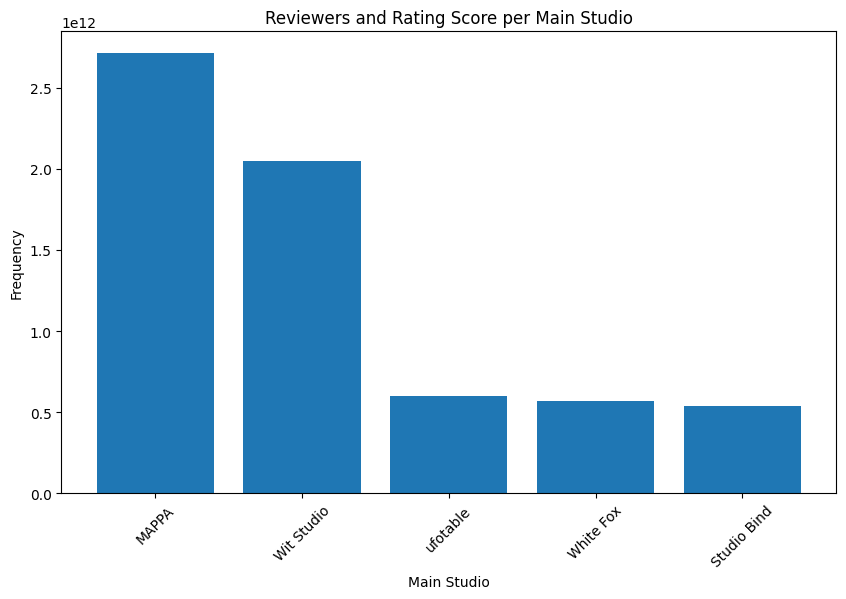

The selected studio is: ['MAPPA' 'Wit Studio']


In [11]:
# Combined bar plot for Reviewers and Rating Score
plt.figure(figsize=(10, 6))
plt.bar(pivot_studio.index, pivot_studio["Reviewers"])
plt.xlabel("Main Studio")
plt.ylabel("Frequency")
plt.title("Reviewers and Rating Score per Main Studio")
plt.xticks(rotation=45)
plt.show();

selected_studio = pivot_studio.index[:2].values
print("The selected studio is:", selected_studio)

In [12]:
selected_dataset = data_best.loc[data_best['Main Studio'].isin(selected_studio)]

selected_dataset.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
73,Vivy: Fluorite Eye's Song,Wit Studio,13,8.39,205,412.0,570600,11140,2.569810e+11,2.239645,26.272268,0,Best
186,Ousama Ranking,Wit Studio,23,8.50,143,314.0,696160,13233,3.669430e+11,2.251292,26.628472,0,Best
246,Ousama Ranking,Wit Studio,23,8.50,143,314.0,696160,13234,3.669430e+11,2.251292,26.628472,0,Best
297,Spy x Family,Wit Studio,12,8.47,153,61.0,1706259,40064,1.047440e+13,2.248129,29.979955,0,Best


After we get the best title based on the "best" studio category

In [20]:
from ast import literal_eval

data_char = pd.read_csv("ColoredCharacterDataset.csv")
data_char = data_char.drop(columns=["Unnamed: 0"])
data_char['colors'] = data_char['colors'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

data_char.head()

,jp_title,char_name,fav,img,colors
0,Horimiya,Izumi Miyamura (宮村 伊澄),16137,https://cdn.myanimelist.net/images/characters/...,"[[194, 222, 249], [185, 220, 250], [177, 200, ..."
1,Horimiya,Kyouko Hori (堀 京子),12528,https://cdn.myanimelist.net/images/characters/...,"[[220, 237, 253], [208, 227, 250], [192, 203, ..."
2,Horimiya,Yuki Yoshikawa (吉川 由紀),1502,https://cdn.myanimelist.net/images/characters/...,"[[195, 219, 249], [158, 226, 245], [141, 216, ..."
3,Horimiya,Kyousuke Hori (堀 京介),1061,https://cdn.myanimelist.net/images/characters/...,"[[221, 236, 245], [202, 232, 253], [192, 219, ..."
4,Horimiya,Honoka Sawada (沢田 ほのか),433,https://cdn.myanimelist.net/images/characters/...,"[[226, 234, 243], [191, 210, 239], [174, 201, ..."


In [21]:
data_char.colors[0]

[[194, 222, 249],
 [185, 220, 250],
 [177, 200, 225],
 [153, 176, 198],
 [134, 146, 170],
 [107, 120, 144],
 [75, 85, 105],
 [31, 28, 93],
 [14, 9, 12],
 [43, 29, 30],
 [50, 45, 49],
 [66, 61, 63],
 [75, 41, 44],
 [80, 75, 72],
 [87, 81, 80],
 [99, 42, 64],
 [104, 79, 65],
 [111, 102, 109],
 [142, 129, 131],
 [43, 44, 171],
 [172, 159, 167],
 [175, 124, 81],
 [183, 133, 162],
 [190, 185, 186],
 [175, 152, 207],
 [212, 207, 204],
 [228, 226, 228],
 [242, 242, 242],
 [249, 248, 248],
 [254, 254, 254]]

In [13]:
# import pandas as pd

# # Load the dataset
# data_anime = pd.read_csv("FullCompleteDataset.csv", delimiter=";")

# # Create an empty list to store sampled rows
# sampled_data = []

# # Loop through each unique status and take a sample of 10 rows
# for status in data_anime["Status"].unique():
#     sampled_rows = data_anime.loc[data_anime["Status"] == status].sample(30)
#     sampled_data.append(sampled_rows)

# # Concatenate all sampled rows into a new DataFrame
# new_dataset = pd.concat(sampled_data)

# # Save the new dataset to a CSV file
# new_dataset.to_csv("Sampled_Anime_Dataset.csv", index=False)


In [14]:
# # Display the first few rows of the new dataset
# new_dataset.head(10)

In [15]:
# for cluster in sorted(data.Cluster.unique()):
#     print(data.loc[data.Cluster == cluster].sample(5).Main_Studio.tolist())

In [16]:
# for cluster in sorted(data.Cluster.unique()):
#     data_sampling = data.loc[data.Cluster == cluster]
#     print(f"[Cluster {cluster} with {data_sampling.shape[0]} studios]")

#     print("Rating Score", round(data_sampling["Rating Score"].mean(), 2))
#     print("Max", round(data_sampling["Rating Score"].max(), 2))
#     print("Min", round(data_sampling["Rating Score"].min(), 2))

#     print("Reviewers", round(data_sampling["Reviewers"].mean()))
#     print("Max", round(data_sampling["Reviewers"].max()))
#     print("Min", round(data_sampling["Reviewers"].min()))

#     print("\n")

#     # print(data_sampling.Main_Studio.tolist()[:5])